In [1]:
import pandas as pd
from plotting import CandlePlot
pd.set_option("display.max_columns", None)

In [2]:
df_ma_res = pd.read_pickle("../data/ma_res.pkl")
df_ma_trades = pd.read_pickle("../data/ma_trades.pkl")

In [3]:
df_ma_res.granularity.unique()

array(['H1', 'H4'], dtype=object)

In [4]:
df_ma_res_h1 = df_ma_res[df_ma_res.granularity == "H1"].copy()
df_ma_trades_h1 = df_ma_trades[df_ma_trades.granularity == "H1"].copy()

In [5]:
df_ma_trades_h1.shape

(16951, 32)

In [6]:
df_ma_res_h1.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'ma_l', 'ma_s', 'cross', 'granularity'],
      dtype='object')

In [7]:
df_cross_summary = df_ma_res_h1[['pair', 'num_trades', 'total_gain','cross']].copy()

In [8]:
df_cross_gr = df_cross_summary.groupby(by="cross", as_index=False).sum()
df_cross_gr.sort_values(by="total_gain", ascending=False, inplace=True)

In [9]:
df_cross_gr.head()

cross                                               pair  \
3   MA_10_MA_40  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
7   MA_20_MA_40  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
2   MA_10_MA_20  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
11  MA_30_MA_40  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
8   MA_20_MA_80  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   

    num_trades  total_gain  
3         1698        5782  
7         1492        4499  
2         3155        3509  
11        1691        3276  
8          888        -843

In [10]:
total_pairs = len(df_ma_res_h1.pair.unique())

In [11]:
total_pairs

15

In [12]:
temp = df_ma_res_h1[df_ma_res_h1.cross == "MA_10_MA_40"]

In [13]:
temp[temp.total_gain > 0].shape[0]

10

In [14]:
for c in df_ma_res_h1.cross.unique():
    temp = df_ma_res_h1[df_ma_res_h1.cross == c]
    pg = temp[temp.total_gain > 0].shape[0]
    print(f"{c} pg:{pg} perc gain:{(pg / total_pairs) * 100:.0f}%")

MA_10_MA_20 pg:8 perc gain:53%
MA_10_MA_40 pg:10 perc gain:67%
MA_20_MA_40 pg:11 perc gain:73%
MA_30_MA_40 pg:11 perc gain:73%
MA_10_MA_80 pg:6 perc gain:40%
MA_20_MA_80 pg:5 perc gain:33%
MA_30_MA_80 pg:7 perc gain:47%
MA_40_MA_80 pg:6 perc gain:40%
MA_10_MA_120 pg:4 perc gain:27%
MA_20_MA_120 pg:5 perc gain:33%
MA_30_MA_120 pg:4 perc gain:27%
MA_40_MA_120 pg:4 perc gain:27%
MA_10_MA_150 pg:5 perc gain:33%
MA_20_MA_150 pg:5 perc gain:33%
MA_30_MA_150 pg:4 perc gain:27%
MA_40_MA_150 pg:2 perc gain:13%


In [15]:
cross = "MA_10_MA_20"
df_MA_10_MA_20 = df_ma_res_h1[df_ma_res_h1.cross == cross].copy()
df_MA_10_MA_20.sort_values(by="total_gain", ascending=False, inplace=True)

In [16]:
df_MA_10_MA_20

pair  num_trades  total_gain  mean_gain  min_gain  max_gain   ma_l  \
128  GBP_JPY         212        1571          7      -264       644  MA_20   
224  CAD_JPY         205        1319          6       -93       306  MA_20   
48   EUR_AUD         193        1278          6      -159       396  MA_20   
32   EUR_JPY         196        1190          6      -278       376  MA_20   
192  AUD_JPY         189        1115          5       -98       281  MA_20   
80   USD_JPY         202         776          3      -157       331  MA_20   
176  AUD_USD         209         330          1      -102       179  MA_20   
208  AUD_CAD         207          37          0      -106       116  MA_20   
96   USD_CAD         225         -94          0      -107       244  MA_20   
144  GBP_AUD         205        -216         -1      -183       366  MA_20   
16   EUR_GBP         224        -304         -1       -46        94  MA_20   
160  GBP_CAD         228        -747         -3      -110       251  MA_20   
0    EUR_USD         216        -817         -3       -98       211  MA_20   
112  GBP_USD         234        -928         -3      -130       250  MA_20   
64   EUR_CAD         210       -1001         -4      -150       377  MA_20   

      ma_s        cross granularity  
128  MA_10  MA_10_MA_20          H1  
224  MA_10  MA_10_MA_20          H1  
48   MA_10  MA_10_MA_20          H1  
32   MA_10  MA_10_MA_20          H1  
192  MA_10  MA_10_MA_20          H1  
80   MA_10  MA_10_MA_20          H1  
176  MA_10  MA_10_MA_20          H1  
208  MA_10  MA_10_MA_20          H1  
96   MA_10  MA_10_MA_20          H1  
144  MA_10  MA_10_MA_20          H1  
16   MA_10  MA_10_MA_20          H1  
160  MA_10  MA_10_MA_20          H1  
0    MA_10  MA_10_MA_20          H1  
112  MA_10  MA_10_MA_20          H1  
64   MA_10  MA_10_MA_20          H1

In [17]:
df_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&
                           (df_ma_trades_h1.pair=="CAD_JPY")].copy()

In [18]:
df_gains.head(3)

time  volume   mid_o   mid_h   mid_l   mid_c  \
15889 2023-04-06 11:00:00+00:00    3479  97.574  97.700  97.522  97.659   
15890 2023-04-07 04:00:00+00:00     937  97.640  97.674  97.619  97.642   
15891 2023-04-07 14:00:00+00:00    1930  97.847  97.880  97.782  97.786   

        bid_o   bid_h   bid_l   bid_c   ask_o   ask_h   ask_l   ask_c  \
15889  97.564  97.691  97.514  97.650  97.585  97.708  97.530  97.668   
15890  97.628  97.663  97.607  97.632  97.651  97.686  97.631  97.653   
15891  97.834  97.867  97.770  97.774  97.860  97.893  97.794  97.799   

           MA_40    MA_10    MA_80     MA_20     MA_150     MA_120      MA_30  \
15889  97.571500  97.4435  98.1081  97.43050  98.061380  98.171167  97.462333   
15890  97.530075  97.6523  97.8839  97.66145  98.082747  98.103267  97.567233   
15891  97.590050  97.6585  97.7490  97.65540  98.076293  98.045875  97.660467   

         DELTA  DELTA_PREV  TRADE   DIFF  GAIN granularity     pair  GAIN_C  \
15889  0.01300    -0.00870      1 -0.017  -1.7          H1  CAD_JPY    -1.7   
15890 -0.00915     0.01485     -1  0.144 -14.4          H1  CAD_JPY   -16.1   
15891  0.00310    -0.01230      1  0.810  81.0          H1  CAD_JPY    64.9   

        ma_l   ma_s        cross  
15889  MA_20  MA_10  MA_10_MA_20  
15890  MA_20  MA_10  MA_10_MA_20  
15891  MA_20  MA_10  MA_10_MA_20

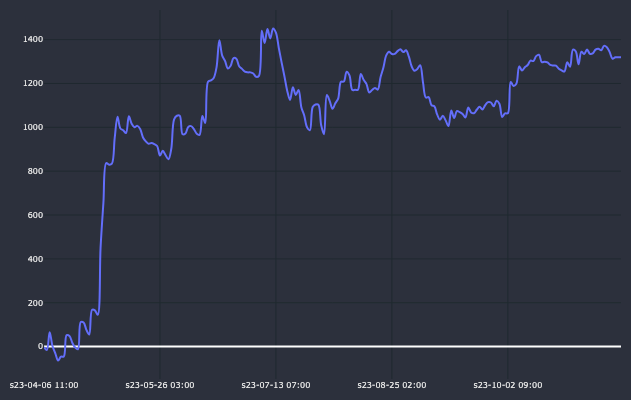

In [19]:
cp = CandlePlot(df_gains, candles=False)
cp.show_plot(line_traces=['GAIN_C'])

GBP_JPY 1571


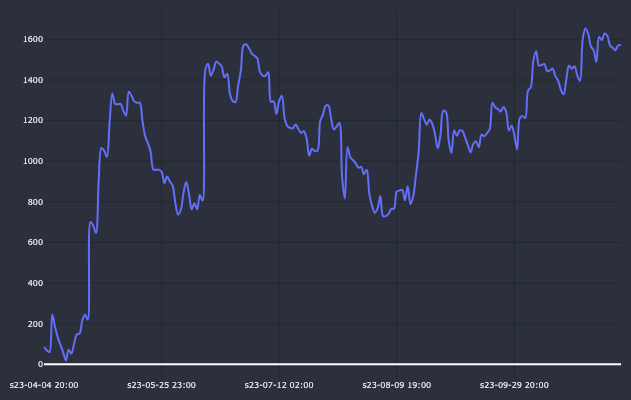

CAD_JPY 1319


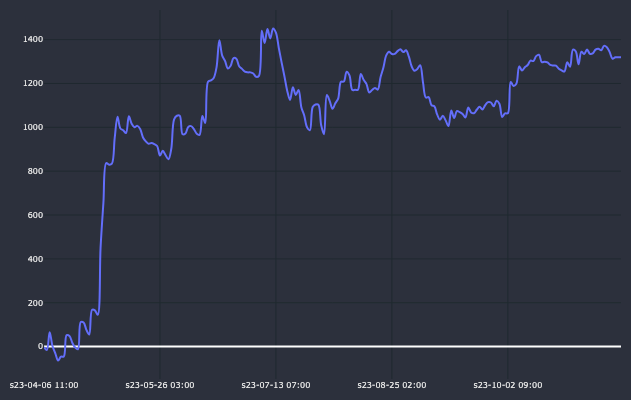

EUR_AUD 1278


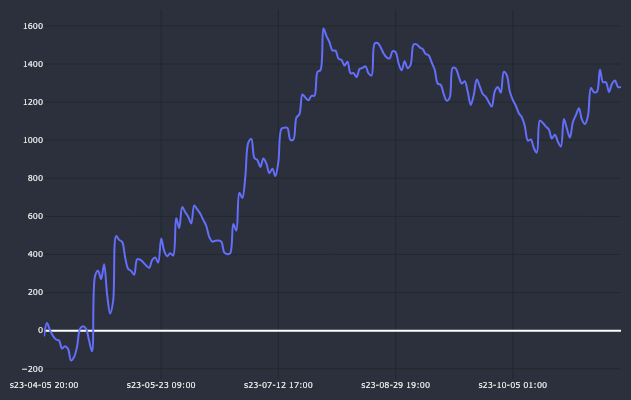

EUR_JPY 1190


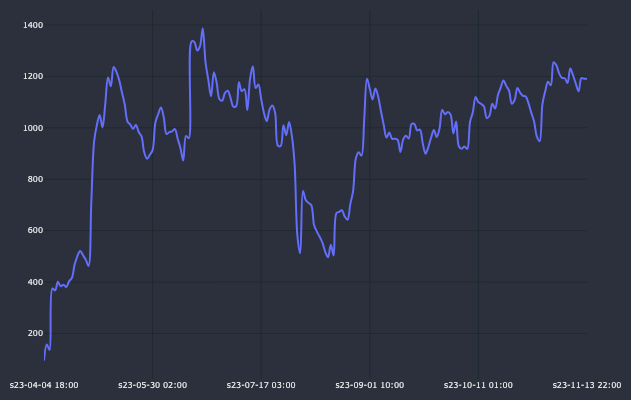

AUD_JPY 1115


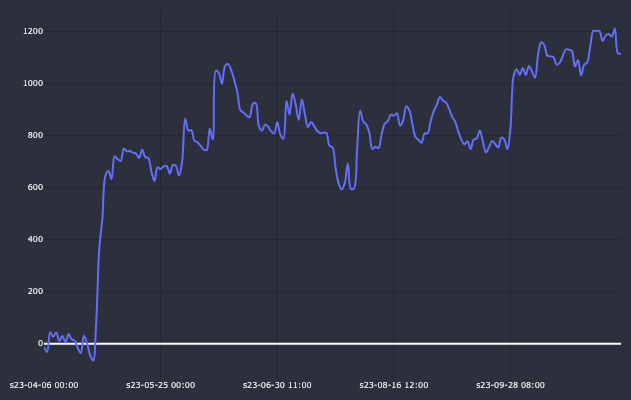

USD_JPY 776


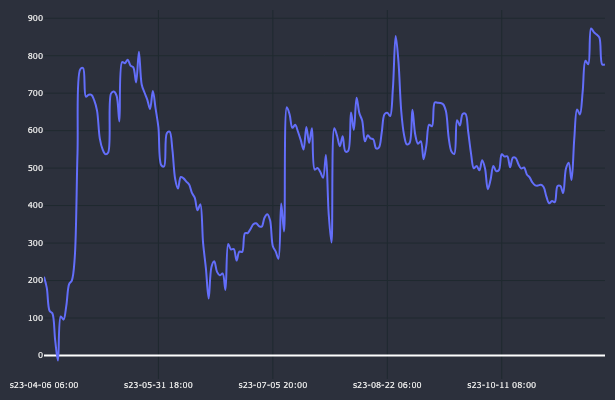

AUD_USD 330


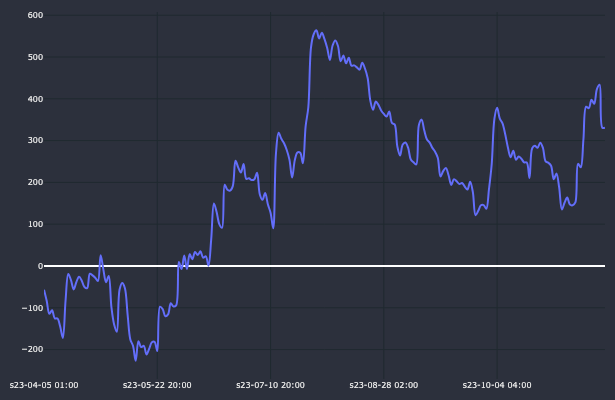

AUD_CAD 37


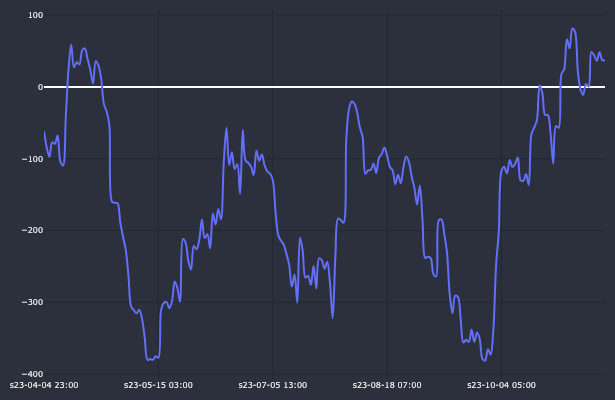

In [20]:
for curr in df_MA_10_MA_20[df_MA_10_MA_20.total_gain > 0].pair.unique():
    temp_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&
                           (df_ma_trades_h1.pair==curr)].copy()
    print(curr, int(temp_gains.GAIN.sum()))
    cp = CandlePlot(temp_gains, candles=False)
    cp.show_plot(line_traces=['GAIN_C'])

time  volume      mid_o      mid_h      mid_l  \
0     2023-04-05 10:00:00+00:00    3340    1.09520    1.09536    1.09413   
1     2023-04-06 13:00:00+00:00    6583    1.08922    1.08998    1.08858   
2     2023-04-07 06:00:00+00:00    1269    1.09170    1.09194    1.09116   
3     2023-04-11 03:00:00+00:00    2386    1.08824    1.08879    1.08796   
4     2023-04-14 14:00:00+00:00   11668    1.10305    1.10305    1.09964   
...                         ...     ...        ...        ...        ...   
16946 2023-09-12 16:00:00+00:00    3260  108.55000  108.58100  108.51400   
16947 2023-10-02 14:00:00+00:00   11587  109.73300  109.80600  109.56800   
16948 2023-10-09 19:00:00+00:00    2012  109.26800  109.36200  109.24900   
16949 2023-10-19 01:00:00+00:00    3337  109.18000  109.24100  109.13800   
16950 2023-11-01 08:00:00+00:00    2429  109.08800  109.09900  108.88600   

           mid_c      bid_o      bid_h      bid_l      bid_c      ask_o  \
0        1.09458    1.09512    1.09528    1.09406    1.09450    1.09528   
1        1.08968    1.08916    1.08992    1.08852    1.08961    1.08929   
2        1.09182    1.09161    1.09187    1.09108    1.09176    1.09179   
3        1.08815    1.08817    1.08872    1.08788    1.08807    1.08832   
4        1.10063    1.10292    1.10292    1.09956    1.10056    1.10318   
...          ...        ...        ...        ...        ...        ...   
16946  108.55800  108.54200  108.57100  108.50500  108.54900  108.55900   
16947  109.66200  109.71500  109.79600  109.55700  109.65200  109.75100   
16948  109.29200  109.25800  109.35200  109.23900  109.28200  109.27800   
16949  109.16100  109.16900  109.23000  109.12700  109.15000  109.19100   
16950  108.91200  109.07800  109.08900  108.87500  108.90200  109.09800   

           ask_h      ask_l      ask_c       MA_40       MA_10       MA_80  \
0        1.09544    1.09420    1.09465    1.093053    1.095383    1.089453   
1        1.09006    1.08865    1.08975    1.092231    1.090090    1.091243   
2        1.09201    1.09123    1.09189    1.091005    1.091795    1.092198   
3        1.08886    1.08804    1.08823    1.088716    1.086975    1.089930   
4        1.10318    1.09971    1.10070    1.103613    1.105130    1.098612   
...          ...        ...        ...         ...         ...         ...   
16946  108.59100  108.52300  108.56700  107.965625  108.321300  107.919575   
16947  109.81500  109.57900  109.67100  110.394225  110.022400  110.504163   
16948  109.37200  109.25900  109.30300  109.064025  109.186700  108.681462   
16949  109.25300  109.14800  109.17200  109.602300  109.285100  109.652212   
16950  109.10900  108.89800  108.92200  108.700425  109.008300  108.436775   

            MA_20      MA_150      MA_120       MA_30     DELTA  DELTA_PREV  \
0        1.095411    1.087577    1.088599    1.094106 -0.000028    0.000002   
1        1.090070    1.088899    1.089850    1.091091  0.000020   -0.000047   
2        1.091887    1.089793    1.090087    1.091177 -0.000093    0.000035   
3        1.086898    1.090103    1.091123    1.088073  0.000078   -0.000356   
4        1.105409    1.094538    1.095266    1.104999 -0.000279    0.000136   
...           ...         ...         ...         ...       ...         ...   
16946  108.166800  107.961687  107.992150  108.072233  0.003938   -0.008385   
16947  110.101700  110.403660  110.462717  110.285300 -0.009435    0.012362   
16948  109.199600  109.053187  108.805767  109.195200  0.010838   -0.019962   
16949  109.483150  109.604267  109.620133  109.568533 -0.001967    0.011950   
16950  109.101000  108.685840  108.567358  108.976733  0.014585   -0.020438   

       TRADE     DIFF   GAIN granularity     pair  GAIN_C    ma_l   ma_s  \
0         -1 -0.00490   49.0          H1  EUR_USD    49.0   MA_20  MA_10   
1          1  0.00214   21.4          H1  EUR_USD    70.4   MA_20  MA_10   
2         -1 -0.00367   36.7          H1  EUR_USD   107.1   MA_20  MA_10   
3          1  0.01248  